#### Getting Started
We will be using TensorFlow and  Keras for data augmentation and matplotlib for displaying the images.

In [1]:
from glob import glob
import pandas as pd
import cv2
from scripts.visualization import Visualization
import matplotlib.pyplot as plt
import numpy as np

#### Reading Data

In [2]:
# Path to all data
data_dir = './lgg-mri-segmentation/kaggle_3m'

# img size
IMG_SIZE = 512

In [3]:
images_paths = []
masks_paths = glob(f'{data_dir}/*/*_mask*')

for i in masks_paths:
    images_paths.append(i.replace('_mask', ''))

df = pd.DataFrame(data= {'images_paths': images_paths, 'masks_paths': masks_paths})
df.head()

,images_paths,masks_paths
0,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...
1,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...
2,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...
3,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...
4,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...


In [4]:
def pos_neg_diagnosis(masks_paths):
    value = np.max(cv2.imread(masks_paths))
    if value > 0 :
        return 1
    else:
        return 0

df['label'] = df['masks_paths'].apply(lambda x: pos_neg_diagnosis(x))
df

,images_paths,masks_paths,label
0,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,0
1,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,0
2,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,0
3,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,0
4,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,0
...,...,...,...
3924,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,0
3925,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,0
3926,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,0
3927,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,0


#### Data Distribution

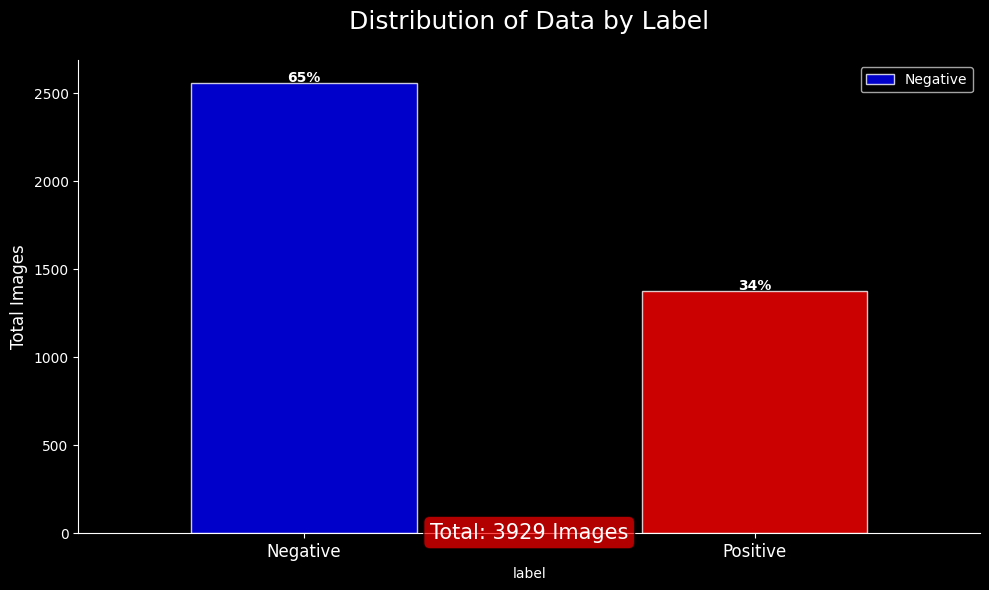

In [5]:
visualization = Visualization(df)
visualization.plot_distribution_grouped_by_label()

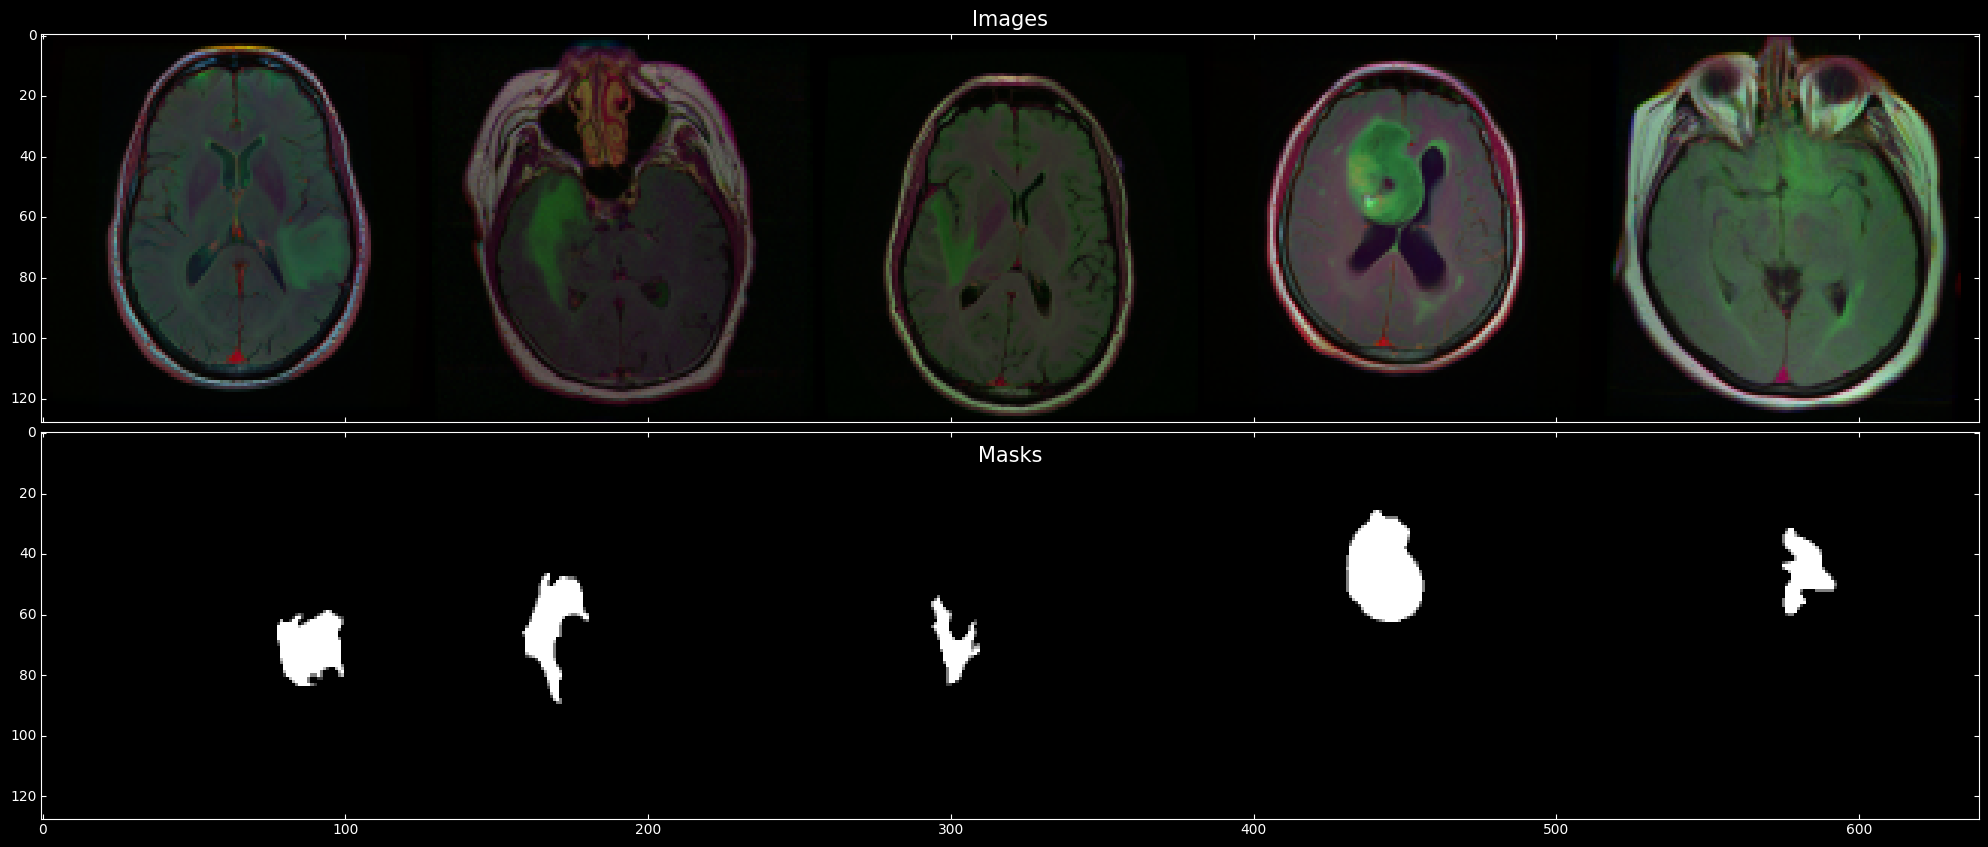

In [6]:
visualization = Visualization(df)
visualization.plot_images_and_masks()

#### Data Loading

In the code below, we have loaded 80% training, 10% validation, and a 10% test set with labels and metadata.

In [7]:
mask_df = df[df['label'] == 1]
mask_df.shape

(1373, 3)

In [8]:
from sklearn.model_selection import train_test_split
# Split df into train_df and val_df
train_df, val_df = train_test_split(mask_df, stratify=mask_df.label, test_size=0.1)
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

# Split train_df into train_df and test_df
val_df, test_df = train_test_split(val_df, stratify=val_df.label, test_size=0.3)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# train_df = train_df[:1000]
print(f"Train: {train_df.shape} \nVal: {val_df.shape} \nTest: {test_df.shape}")

Train: (1235, 3) 
Val: (96, 3) 
Test: (42, 3)


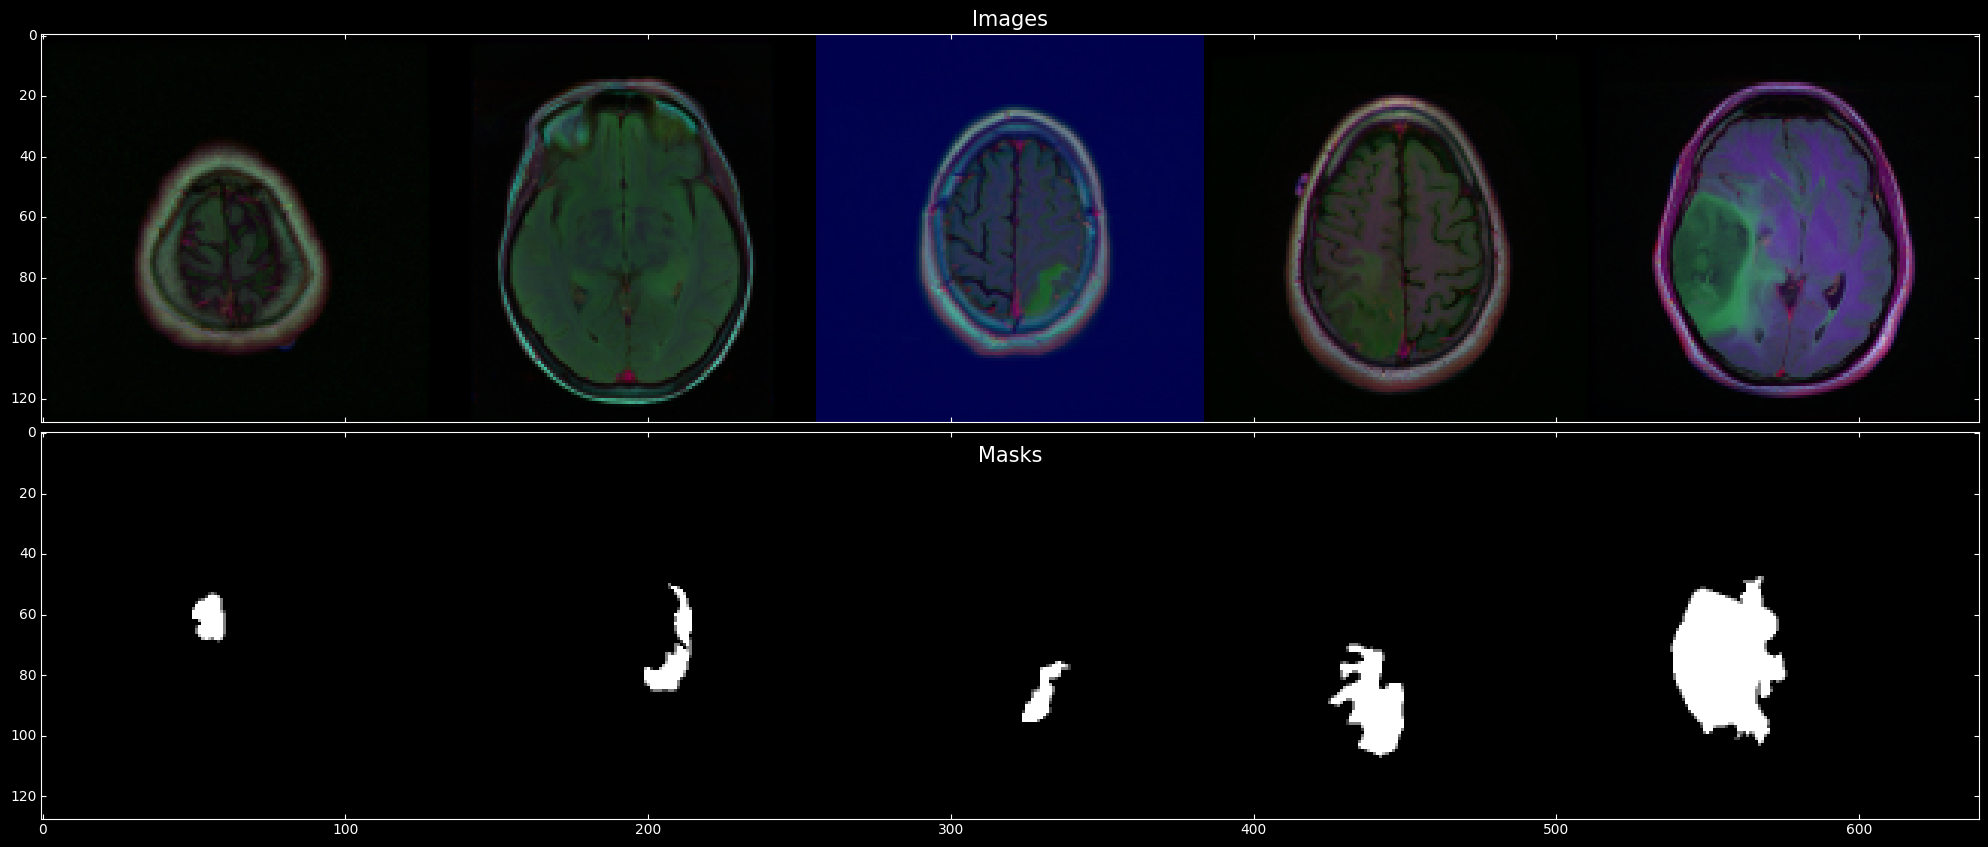

In [9]:
visualization = Visualization(train_df)
visualization.plot_images_and_masks()

#### GAN

In [10]:
train_df

,images_paths,masks_paths,label
0,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A4MT_...,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A4MT_...,1
1,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_7019_...,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_7019_...,1
2,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_8167_...,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_8167_...,1
3,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_...,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_...,1
4,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_5871_...,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_5871_...,1
...,...,...,...
1230,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_6401_...,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_6401_...,1
1231,./lgg-mri-segmentation/kaggle_3m/TCGA_HT_7877_...,./lgg-mri-segmentation/kaggle_3m/TCGA_HT_7877_...,1
1232,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6669_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6669_...,1
1233,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_5964_...,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_5964_...,1


In [11]:
from scripts.brain_mri_dataset import BrainMriDataset
from torch.utils.data import DataLoader
IMG_SIZE = 64
BATCH_SIZE = 128

# train
train_dataset = BrainMriDataset(df=train_df, img_size=IMG_SIZE)
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, num_workers=4, shuffle=True)

# val
val_dataset = BrainMriDataset(df=val_df, img_size=IMG_SIZE)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, num_workers=4, shuffle=True)

#test
test_dataset = BrainMriDataset(df=test_df, img_size=IMG_SIZE)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, num_workers=4, shuffle=True)

In [12]:
images, masks, labels = next(iter(train_dataloader))

In [13]:
print(images.shape, masks.shape)

torch.Size([128, 64, 64, 3]) torch.Size([128, 64, 64, 3])


In [14]:
print(images[0].shape, masks[0].shape)

torch.Size([64, 64, 3]) torch.Size([64, 64, 3])


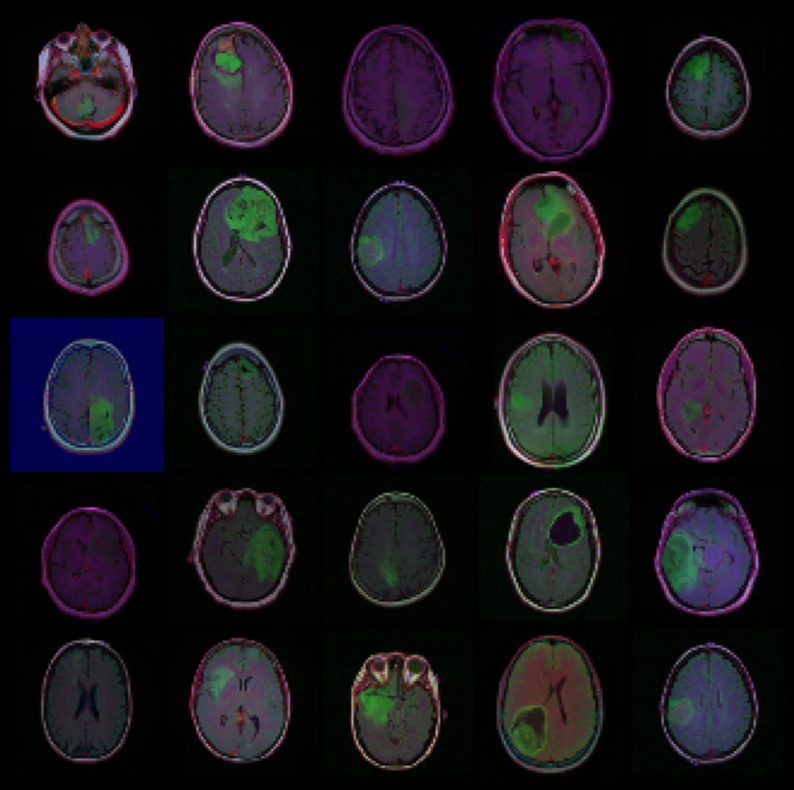

In [15]:
visualization = Visualization(train_df)
visualization.plot_images(images)

In [16]:
from scripts.gan import SimpleGAN

# Instantiate and train the GAN
gan = SimpleGAN(img_size=IMG_SIZE)

Metal device set to: Apple M1 Pro
Model: "Discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Discriminator-Hidden-Layer-  (None, 32, 32, 64)       3136      
 1 (Conv2D)                                                      
                                                                 
 Discriminator-Hidden-Layer-  (None, 32, 32, 64)       0         
 Activation-1 (LeakyReLU)                                        
                                                                 
 Discriminator-Hidden-Layer-  (None, 16, 16, 128)      131200    
 2 (Conv2D)                                                      
                                                                 
 Discriminator-Hidden-Layer-  (None, 16, 16, 128)      0         
 Activation-2 (LeakyReLU)                                        
                                                                 
 Discriminator-Hidd

In [17]:
gan.train(images, epochs=2000, batch_size=128)

1/4 [======>.......................] - ETA: 0s

2023-09-06 02:20:46.073532: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


4/4 [==============================] - 1s 245ms/step
0/2000 [D loss: 0.7043, acc.: 12.89%] [G loss: 0.6898]
Models and loss histories saved.
4/4 [==============================] - 1s 257ms/step
100/2000 [D loss: 0.5610, acc.: 87.11%] [G loss: 1.2007]
Models and loss histories saved.
4/4 [==============================] - 1s 255ms/step


4/4 [==============================] - 1s 243ms/step
200/2000 [D loss: 0.5105, acc.: 74.61%] [G loss: 2.0611]
Models and loss histories saved.
4/4 [==============================] - 1s 263ms/step


4/4 [==============================] - 1s 256ms/step
300/2000 [D loss: 0.5405, acc.: 79.69%] [G loss: 1.3781]
Models and loss histories saved.
4/4 [==============================] - 1s 254ms/step
400/2000 [D loss: 0.5273, acc.: 83.98%] [G loss: 1.1779]
Models and loss histories saved.
4/4 [==============================] - 1s 255ms/step


4/4 [==============================] - 1s 243ms/step
500/2000 [D loss: 0.5970, acc.: 72.27%] [G loss: 0.9698]
Models and loss histories saved.
4/4 [==============================] - 1s 255ms/step


4/4 [==============================] - 1s 255ms/step
600/2000 [D loss: 0.5814, acc.: 82.03%] [G loss: 0.9852]
Models and loss histories saved.
4/4 [==============================] - 1s 243ms/step
700/2000 [D loss: 0.5976, acc.: 77.34%] [G loss: 0.9785]
Models and loss histories saved.
4/4 [==============================] - 1s 254ms/step


4/4 [==============================] - 1s 259ms/step
800/2000 [D loss: 0.6176, acc.: 75.00%] [G loss: 0.9438]
Models and loss histories saved.
4/4 [==============================] - 1s 255ms/step


4/4 [==============================] - 1s 245ms/step
900/2000 [D loss: 0.6153, acc.: 73.44%] [G loss: 0.9695]
Models and loss histories saved.
4/4 [==============================] - 1s 254ms/step
1000/2000 [D loss: 0.5954, acc.: 78.91%] [G loss: 1.0183]
Models and loss histories saved.
4/4 [==============================] - 1s 257ms/step


4/4 [==============================] - 1s 252ms/step
1100/2000 [D loss: 0.5830, acc.: 75.00%] [G loss: 1.0498]
Models and loss histories saved.
4/4 [==============================] - 1s 260ms/step


4/4 [==============================] - 1s 243ms/step
1200/2000 [D loss: 0.5385, acc.: 78.12%] [G loss: 1.3047]
Models and loss histories saved.
4/4 [==============================] - 1s 254ms/step
1300/2000 [D loss: 0.5478, acc.: 79.69%] [G loss: 1.0832]
Models and loss histories saved.
4/4 [==============================] - 1s 243ms/step


4/4 [==============================] - 1s 243ms/step
1400/2000 [D loss: 0.5537, acc.: 76.17%] [G loss: 0.9750]
Models and loss histories saved.
4/4 [==============================] - 1s 256ms/step


4/4 [==============================] - 1s 253ms/step
1500/2000 [D loss: 0.5247, acc.: 83.59%] [G loss: 1.0712]
Models and loss histories saved.
4/4 [==============================] - 1s 244ms/step
1600/2000 [D loss: 0.4795, acc.: 92.58%] [G loss: 1.2695]
Models and loss histories saved.
4/4 [==============================] - 1s 248ms/step


4/4 [==============================] - 1s 257ms/step
1700/2000 [D loss: 0.4719, acc.: 91.02%] [G loss: 1.1944]
Models and loss histories saved.
4/4 [==============================] - 1s 252ms/step


4/4 [==============================] - 1s 248ms/step
1800/2000 [D loss: 0.4409, acc.: 92.58%] [G loss: 1.4071]
Models and loss histories saved.
4/4 [==============================] - 1s 242ms/step
1900/2000 [D loss: 0.4183, acc.: 91.02%] [G loss: 1.4846]
Models and loss histories saved.
4/4 [==============================] - 1s 243ms/step


4/4 [==============================] - 1s 243ms/step
Models and loss histories saved.


In [18]:
# Generate synthetic images
num_images = 1000
generated_images = gan.generate_images(num_images)

32/32 [==============================] - 8s 250ms/step


In [21]:
# Display a few samples from the dataset
def display_images(images):
    fig, axs = plt.subplots(4,4)
    count = 0
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow((images[count] * 0.5) + 0.5)
            axs[i, j].axis('off')
            count += 1
    plt.show()

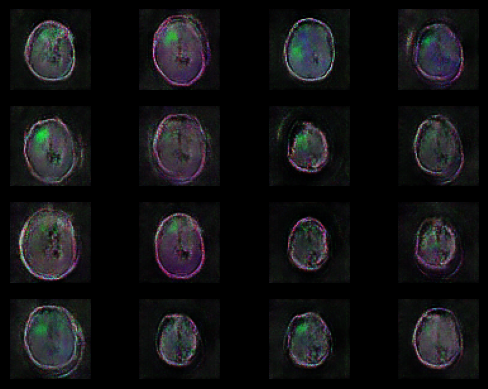

In [22]:
# Display the generated images
display_images(generated_images)

In [23]:
print(generated_images.shape)

(1000, 64, 64, 3)


In [24]:
test_images, test_masks, test_labels = next(iter(test_dataloader))

# Model evaluation

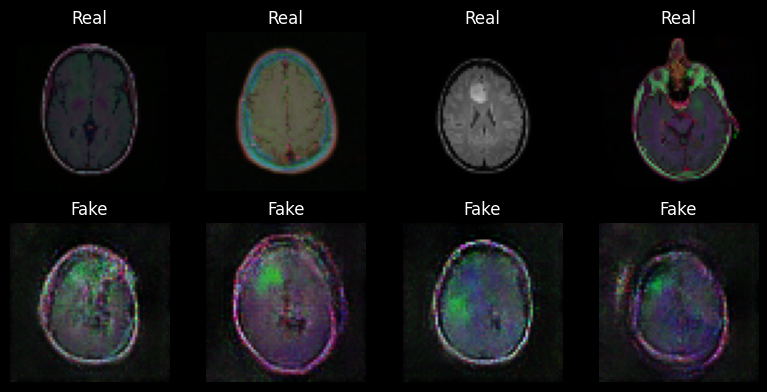

In [28]:
gan.plot_real_vs_fake(test_images, 1000, 4)

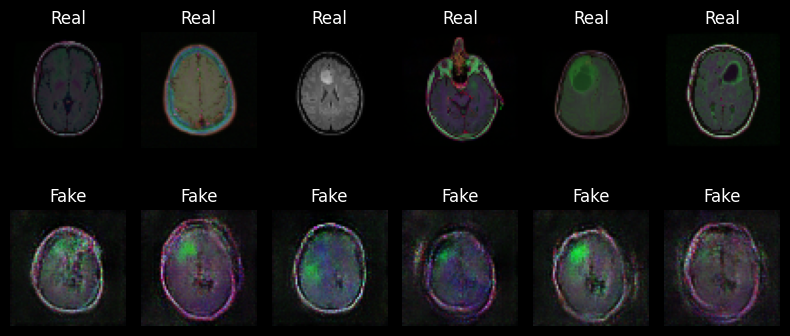

In [29]:
gan.plot_real_vs_fake(test_images, 1000, 6)

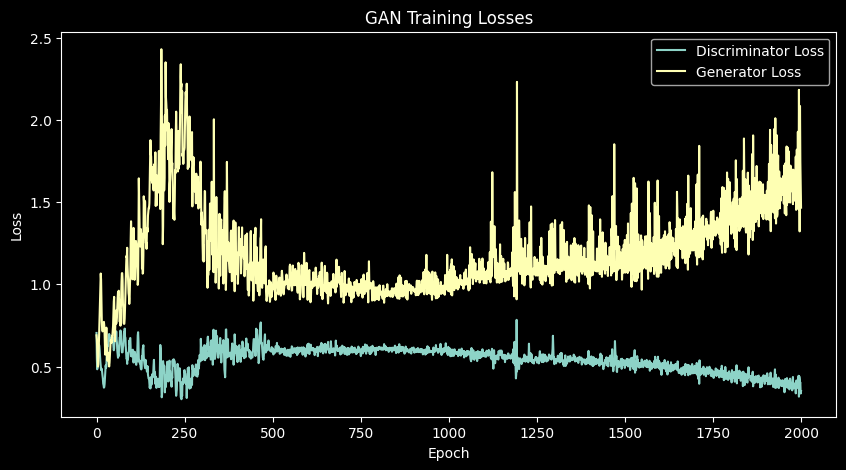

In [30]:
gan.plot_losses()

# Brain Cancer Classifier

#### The fundamental idea underlying this classifier involves a two-step training process. Initially, the model is trained using authentic data, followed by a subsequent training round where both authentic and synthetic data are used. This approach aims to assess whether the classifier's performance exhibits improvement after incorporating synthetic data alongside genuine data.

In [31]:
from scripts.brain_cancer_classifier import BrainCancerClassifier

In [32]:
classifier = BrainCancerClassifier()

#### Based on real images

In [33]:
all_data = df

In [34]:
# Split df into train_df and val_df
all_train_df, all_val_df = train_test_split(all_data, stratify=all_data.label, test_size=0.1)
all_train_df = all_train_df.reset_index(drop=True)
all_val_df = all_val_df.reset_index(drop=True)

# Split train_df into train_df and test_df
all_val_df, all_test_df = train_test_split(all_val_df, stratify=all_val_df.label, test_size=0.3)
all_val_df = all_val_df.reset_index(drop=True)
all_test_df = all_test_df.reset_index(drop=True)

print(f"Train: {all_train_df.shape} \nVal: {all_val_df.shape} \nTest: {all_test_df.shape}")

Train: (3536, 3) 
Val: (275, 3) 
Test: (118, 3)


In [35]:
IMG_SIZE = 64
BATCH_SIZE = 1000

# train
all_train_dataset = BrainMriDataset(df=all_train_df, img_size=IMG_SIZE)
all_train_dataloader = DataLoader(all_train_dataset, batch_size=BATCH_SIZE, num_workers=4, shuffle=True)

# val
all_val_dataset = BrainMriDataset(df=all_val_df, img_size=IMG_SIZE)
all_val_dataloader = DataLoader(all_val_dataset, batch_size=BATCH_SIZE, num_workers=4, shuffle=True)

#test
all_test_dataset = BrainMriDataset(df=all_test_df, img_size=IMG_SIZE)
all_test_dataloader = DataLoader(all_test_dataset, batch_size=BATCH_SIZE, num_workers=4, shuffle=True)

In [ ]:
all_train_images, all_train_masks, all_train_labels = next(iter(all_train_dataloader))

In [ ]:
all_val_images, all_val_masks, all_val_labels = next(iter(all_val_dataloader))

In [ ]:
classifier.train(all_train_images, all_train_labels, all_val_images, all_val_labels)

In [ ]:
all_test_images, all_test_masks, all_test_labels = next(iter(all_test_dataloader))

In [ ]:
classifier.plot_training_history()

In [ ]:
classifier.evaluate(all_test_images, all_test_labels)

In [ ]:
from scripts.brain_mri_dataset import CombinedBrainMriDataset

In [ ]:
IMG_SIZE = 64
BATCH_SIZE = 1000

# Instantiate the CombinedBrainMriDataset
combined_dataset = CombinedBrainMriDataset(original_df=all_train_df, generated_images=generated_images, img_size=IMG_SIZE)

# Create a DataLoader for the combined dataset
combined_dataloader = DataLoader(combined_dataset, batch_size=BATCH_SIZE, shuffle=True)

#### Based on real and fake images

In [ ]:
balanced_train_images, balanced_train_masks, balanced_train_labels = next(iter(combined_dataloader))

In [ ]:
classifier_with_fake_data = BrainCancerClassifier()

In [ ]:
classifier_with_fake_data.train(balanced_train_images, balanced_train_labels, all_val_images, all_val_labels)

In [ ]:
classifier_with_fake_data.plot_training_history()

In [ ]:
classifier_with_fake_data.evaluate(all_test_images, all_test_labels)